In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def get_order_book_data(target, exchange):
  
    url = "https://api.cryptowat.ch/markets/" + exchange + "/" + target + "/orderbook"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    dic = json.loads(soup.prettify())
    order_ask = dic["result"]["asks"]
    order_bid = dic["result"]["bids"]

    df_bid = pd.DataFrame(np.array(order_bid), columns=["price_bid", "quantity_bid"])
    df_ask = pd.DataFrame(np.array(order_ask), columns=["price_ask", "quantity_ask"])
    
    result = {"bid": df_bid, "ask": df_ask}
    
    return result

target = ["btcusd", "ethusd"]
exchange = ["bitfinex", "gdax", "bitstamp", "gemini"]

# order_book = {}
# for i in target:
#     for j in exchange:
#         tmp = get_order_book_data(target=i, exchange=j)
#         order_book[i + "_" + j] = tmp

In [3]:
order_book = {}
time_frame = np.arange(600)

count = 0
while count < 100:
    print(str(count) + "...")
    for i in target:
        for j in exchange:
            tmp = get_order_book_data(target=i, exchange=j)
            order_book[(time_frame[count], i + "_" + j)] = tmp
    count += 1
    time.sleep(1)


0...
1...
2...
3...
4...
5...
6...
7...
8...
9...
10...
11...
12...
13...
14...
15...
16...
17...
18...
19...
20...
21...
22...
23...
24...
25...
26...
27...
28...
29...
30...
31...
32...
33...
34...
35...
36...
37...
38...
39...
40...
41...
42...
43...
44...
45...
46...
47...
48...
49...
50...
51...
52...
53...
54...
55...
56...
57...
58...
59...
60...
61...
62...
63...
64...
65...
66...
67...
68...
69...
70...
71...
72...
73...
74...
75...
76...
77...
78...
79...
80...
81...
82...
83...
84...
85...
86...
87...
88...
89...
90...
91...
92...
93...
94...
95...
96...
97...
98...
99...


In [4]:
#order_book[(1, 'ethusd_bitfinex')]['bid']

In [5]:
def get_fair_price(bid , ask , n):
    total_bid_vol = sum(bid['quantity_bid'][:n])
    total_ask_vol = sum(ask['quantity_ask'][:n])
    bid_sum = sum(bid['quantity_bid'][:n] * bid['price_bid'][:n])
    ask_sum = sum(ask['quantity_ask'][:n] * ask['price_ask'][:n])
    
    bid_weight_price = bid_sum / total_bid_vol 
    ask_weight_price = ask_sum / total_ask_vol 
    vol_wgt_price =  (bid_weight_price* total_ask_vol + ask_weight_price* total_bid_vol) / (total_ask_vol + total_bid_vol)
    
    best_bid_price = bid['price_bid'].iloc[0]
    best_ask_price = ask['price_ask'].iloc[0]
    
    vol_wgt_price_normalised = (vol_wgt_price - bid_weight_price)*(best_ask_price - best_bid_price)/(ask_weight_price - bid_weight_price) + best_bid_price 
    
    return [best_bid_price , best_ask_price , vol_wgt_price_normalised ]

In [6]:
def get_arb(cur_1,cur_2):
    arb = []
    if (cur_1['bid']['price_bid'].iloc[0] > cur_2['ask']['price_ask'].iloc[0]):
        return [cur_1['bid']['price_bid'].iloc[0] - cur_2['ask']['price_ask'].iloc[0]]
    else:
        return []
    

In [7]:
pair = 'ethusd_bitstamp'
cur_1 = 'btcusd_bitstamp'
cur_2 = 'btcusd_bitfinex'

In [8]:
result = []

In [9]:
for i in range(100):
    result.append(get_fair_price(order_book[(i,pair )]['bid'] , order_book[(i, pair)]['ask'],10))

In [11]:
#for i in range(100):
#    print(get_arb(order_book[(i,cur_1)] , order_book[(i,cur_2)]))

In [12]:
df=pd.DataFrame(result,columns=['bid','ask','vol_wgt_price'])

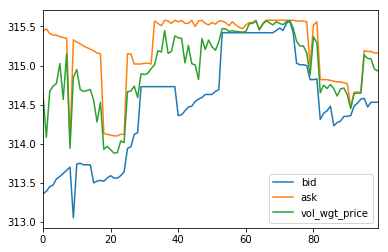

In [13]:
df.plot()
plt.show()